In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [4]:
import datetime
from helpers import *
from plots import *
from implementations import *
from preprocessing import *
from preprocessing_naive import *


features, x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data/dataset")

# Split data into train and validation sets
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    np.random.seed(seed)
    indices = np.random.permutation(len(y))
    split = int(len(y) * ratio)
    training_idx, test_idx = indices[:split], indices[split:]
    return x[training_idx], y[training_idx], x[test_idx], y[test_idx]

ratio = 0.8
x_train, y_train, x_val, y_val = split_data(x_train, y_train, ratio, seed=1)

In [5]:
print(np.shape(features))
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_val))
print(np.shape(y_val))
print(np.shape(x_test))

(321,)
(262508, 321)
(262508,)
(65627, 321)
(65627,)
(109379, 321)


In [6]:
# Show the first 5 rows of the data and statistics
pd.set_option('display.max_columns', None)
data = pd.DataFrame(x_train, columns=features)

data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,35.0,10.0,10072015.0,10.0,7.0,2015.0,1100.0,2.015004e+09,2.015004e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,88.0,30.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,2.0,1.0,6.0,1.0,2.0,NaN,1.0,2.0,7.0,88.0,99.0,1.0,180.0,502.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,3.0,888.0,NaN,NaN,NaN,203.0,203.0,203.0,555.0,203.0,201.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,2.0,1.0,10.0,1.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,5.0,351051.0,17.109993,2.0,34.219987,9.0,NaN,NaN,NaN,1.0,0.726059,76.345588,2.0,9.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,12.0,2.0,78.0,6.0,62.0,1.57,81.65,32.92,4.0,2.0,1.0,4.0,9.0,4.0,1.0,2.0,0.0,1.0,0.0,1.0,0.43,0.43,0.43,0.00,0.43,0.14,0.0,0.0,1.0,1.0,0.86,1.00,2.0,1.0,1.0,1.0,0.0,0.0,2.0,NaN,NaN,19.14,

In [7]:
data.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,262508.000000,262508.000000,2.625080e+05,262508.000000,262508.000000,262508.000000,262508.000000,2.625080e+05,2.625080e+05,151064.0,151064.000000,25.0,151063.0,151064.000000,25.000000,151049.000000,150973.000000,150972.000000,111444.0,111444.0,111443.000000,111444.000000,629.0,111444.000000,110970.000000,108376.000000,262506.000000,262507.000000,262508.000000,134767.000000,262508.000000,262508.000000,262507.000000,262507.000000,262507.000000,105441.000000,262508.000000,227414.000000,227414.000000,262508.000000,262508.000000,35224.000000,262508.000000,262508.000000,262508.000000,262508.000000,262508.000000,262508.000000,262503.000000,33724.000000,262508.000000,262508.000000,262508.000000,262508.000000,151064.000000,7911.000000,151064.000000,262507.000000,262508.000000,262506.000000,260543.000000,259951.000000,259366.000000,259003.000000,38922.000000,256985.000000,256338.000000,255911.000000,255566.000000,255228.000000,254998.000000,254660.000000,254118.000000,109558.000000,36628.000000,72645.000000,253764.000000,253167.000000,125866.000000,125615.000000,125364.000000,245968.000000,245317.000000,244572.000000,244014.000000,243523.000000,242930.000000,241574.000000,176210.00000,175181.000000,174986.000000,174765.000000,117692.000000,11758

In [19]:
data_labeled = pd.DataFrame(np.concatenate((x_train, y_train.reshape(-1,1)), axis=1), columns=np.append(features, ["label"]))
data_labeled.corr()[-1:]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,label
label,0.005662,0.007232,0.006248,0.006857,-0.025774,-0.014937,-0.018082,-0.05061,-0.05061,NaN,0.002156,NaN,NaN,0.012006,-0.402309,-0.061491,-0.021558,-0.067968,NaN,NaN,-0.063922,-0.017545,NaN,-0.022887,-0.039055,-0.007962,0.245301,-0.09857,-0.00793,-0.056017,-0.025169,-0.042296,-0.009871,-0.052097,-0.204321,-0.080563,-0.051227,-0.073132,-0.113989,-0.099584,-0.031688,-0.03463,-0.055957,-0.058682,-0.091229,-0.122806,-0.040656,-0.051741,-0.162082,0.047286,-0.072266,-0.029212,-0.083024,-0.012236,0.000034,0.008132,0.037568,-0.089739,0.207984,0.114296,0.000719,0.108834,-0.024289,-0.016549,0.010364,-0.118197,-0.136054,-0.045831,-0.042678,-0.135624,-0.058759,-0.06782,-0.076702,0.041316,-0.035369,0.010273,-0.004281,0.087465,0.006807,0.051795,-0.003018,-0.000744,0.029284,0.02256,0.049067,0.018245,0.019764,0.046274,0.028955,0.026272,0.007991,0.044835,0.034489,0.029938,0.067037,-0.062552,-0.005966,-0.092589,0.041062,0.019973,-0.054905,0.008616,-0.042886,-0.102892,0.026576,0.047723,0.016172,-0.027604,-0.058427,-0.084509,-0.050845,-0.031855,0.03114,0.02912,-0.011565,-0.017717,-0.042929,-0.010709,0.004715,0.019179,0.030217,0.036264,0.00145,0.007863,0.008446,-0.001796,0.020694,0.083718,0.063878,0.005768,0.026021,-0.041246,0.009026,-0.097667,0.007352,-

<Axes: >

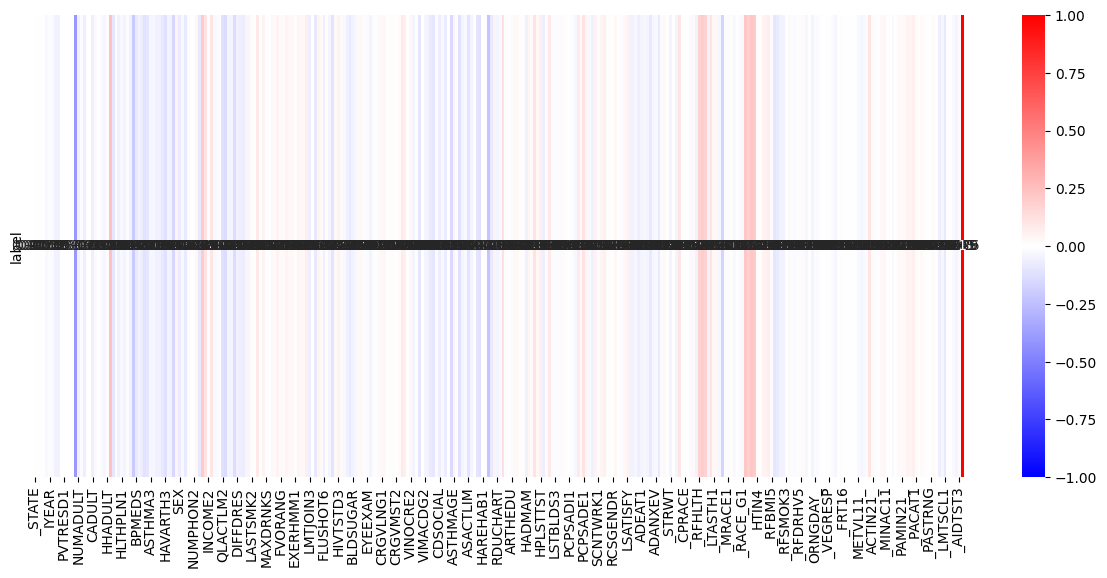

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(data_labeled.corr()[-1:], ax=ax, annot=True, cmap="bwr", vmin=-1, vmax=1)


# Preprocess the data

In [151]:
# Preprocessing of the data (standardization, outliers, ...)
new_x_train, mean, std = preprocessing_dataset_naive(x_train)

def pca(data):
    # compute the mean of each column
    mean = np.mean(data, axis=0)
    mean_data = data - mean
    # compute the covariance matrix
    cov = np.cov(mean_data,rowvar=False)
    cov = np.round(cov, 2)
    

    # compute the eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(cov)
    # sort the eigenvalues and eigenvectors
    idx = np.arange(0, len(eig_val), 1)
    idx = ([x for _, x in sorted(zip(eig_val, idx))])[::-1]
    eig_val = eig_val
    eig_vec = eig_vec[:, idx]
    print("eig_vec",eig_vec.shape)
    # compute the explained variance
    exp_var = eig_val/np.sum(eig_val)
    # compute the cumulative explained variance
    cum_exp_var = np.cumsum(exp_var)
    #get the index of the first value above 99%
    index = np.argmax(cum_exp_var > 0.99)
    #get the number of components
    n_components = index + 1
    #get the components
    components = eig_vec[:, :n_components]
    #transform the data
    transformed_data = np.dot(mean_data, components)
    return transformed_data, mean, components

new_x_train, pca_mean, components = pca(new_x_train)

print(np.shape(new_x_train))
np.set_printoptions(suppress=True, precision=3)

data = pd.DataFrame(new_x_train)

data.describe()
    

eig_vec (200, 200)
(262508, 196)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
count,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05
mean,1.830573e-15,-1.144277e-16,2.308260e-15,-4.148171e-15,1.439827e-15,-4.266699e-15,5.443674e-15,1.870254e-15,1.577763e-15,-8.443616e-15,2.278891e-15,-3.177883e-15,6.119170e-15,-1.359937e-16,1.057891e-15,3.755679e-15,-3.982058e-15,4.527197e-15,-2.517356e-15,2.741150e-15,-3.214506e-15,3.504155e-16,-2.536016e-15,-5.648169e-16,-6.788021e-15,-2.719442e-15,9.393224e-16,-3.477832e-15,1.326509e-15,-5.929508e-15,-4.793356e-15,-1.932861e-15,-2.251878e-16,-4.713123e-15,-5.884306e-15,-2.362753e-15,9.802836e-15,4.370693e-15,-2.165161e-15,2.340416e-15,2.624814e-15,-1.840750e-15,3.413316e-15,1.235170e-15,-1.059691e-16,4.896072e-15,6.161233e-17,3.090293e-16,3.464690e-15,5.700389e-15,-8.428506e-15,2.051914e-15,-3.621360e-15,-4.088257e-15,-3.464771e-16,-8.573472e-15,3.122016e

# Build the model

In [152]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.zeros((new_x_train.shape[1],))

# Start gradient descent.
start_time = datetime.datetime.now()
# gd_ws, gd_losses = least_squares(y_train, new_x_train)
gd_ws, gd_losses = logistic_regression(y_train, new_x_train, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print("Gradient Descent: loss={l}".format(l=gd_losses))
print("Gradient Descent: w={w}".format(w=gd_ws))

GD iter. 0/49: loss=0.6931471605599454, w0=0.013742340189267175, w1=-0.20076316788537707
GD iter. 1/49: loss=0.6240647926492552, w0=-0.0010580452929285136, w1=-0.210219647653502
GD iter. 2/49: loss=0.6148030953677602, w0=0.015010884415828622, w1=-0.21405818283320094
GD iter. 3/49: loss=0.610010915172796, w0=-0.0010117536335165055, w1=-0.2166502486513714
GD iter. 4/49: loss=0.6069788961898709, w0=0.015114698121229996, w1=-0.2183854703524701
GD iter. 5/49: loss=0.6048753812985439, w0=-0.00043166808625299743, w1=-0.21987841905847244
GD iter. 6/49: loss=0.603336457233812, w0=0.014498172913807483, w1=-0.22096233996002257
GD iter. 7/49: loss=0.602174058885616, w0=0.0004516403695600229, w1=-0.2220115857271314
GD iter. 8/49: loss=0.6012725843310088, w0=0.01355414680757645, w1=-0.22279593262340688
GD iter. 9/49: loss=0.6005614828899268, w0=0.0014536343009027598, w1=-0.22359719255231877
GD iter. 10/49: loss=0.5999903109575039, w0=0.012524841154080915, w1=-0.22420265917865057
GD iter. 11/49: loss

# Test the model

In [157]:
new_x_val = preprocessing_dataset_test_naive(x_val, mean, std)
new_x_val = np.dot(new_x_val - pca_mean, components)
y_pred = new_x_val @ gd_ws
threshold = 0.99999999999999999999999
y_pred[y_pred < threshold] = -1
y_pred[y_pred >= threshold] = 1

def precision(y_pred, y_test):
    return np.sum(y_pred[y_pred == 1] == y_test[y_pred == 1]) / np.sum(y_pred == 1)

def recall(y_pred, y_test):
    return np.sum(y_pred[y_test == 1] == y_test[y_test == 1]) / np.sum(y_test == 1)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

def f1_score(y_pred, y_test):
    prec = precision(y_pred, y_test)
    rec = recall(y_pred, y_test)
    return 2 * prec * rec / (prec + rec)

print("Precision: ", precision(y_pred, y_val))
print("Recall: ", recall(y_pred, y_val))
print("Accuracy: ", accuracy(y_pred, y_val))
print("F1 score: ", f1_score(y_pred, y_val))

Precision:  0.29036550745209366
Recall:  0.5779622108423097
Accuracy:  0.8416962530665733
F1 score:  0.38653675819309125


# Create Submission

In [160]:
new_x_test = preprocessing_dataset_test_naive(x_test, mean, std)
new_x_test = np.dot(new_x_test - pca_mean, components)
y_pred = new_x_test @ gd_ws
y_pred[y_pred < threshold] = -1
y_pred[y_pred >= threshold] = 1

create_csv_submission(test_ids, y_pred, "data/submission_gd.csv")